In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
df = pd.read_csv('data.csv')

In [451]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1.0,0,2.0,United-States,<=50K
1,3,NaN,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,0.0,United-States,<=50K
2,2,NaN,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,0,2.0,United-States,<=50K
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,0,2.0,United-States,<=50K
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,2.0,Cuba,<=50K


In [452]:
df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.883900e+04,48841.000000,48839.000000,48842.000000,48841.000000
mean,1.771078,1.896665e+05,10.078152,0.200332,0.114942,1.950677
std,1.295378,1.056048e+05,2.570961,0.746203,0.556924,0.897035
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.175520e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.781470e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.376380e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46040 non-null  object 
 2   fnlwgt          48839 non-null  float64
 3   education       48840 non-null  object 
 4   education-num   48841 non-null  float64
 5   marital-status  48838 non-null  object 
 6   occupation      46025 non-null  object 
 7   relationship    48833 non-null  object 
 8   race            48839 non-null  object 
 9   sex             48838 non-null  object 
 10  capitalgain     48839 non-null  float64
 11  capitalloss     48842 non-null  int64  
 12  hoursperweek    48841 non-null  float64
 13  native-country  47979 non-null  object 
 14  class           48840 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [454]:
# show the pie chart of the income
def show_income_pie_chart(data: pd.DataFrame, name: str):
    count = data[name].value_counts()
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(name)
    ax.pie(count, labels=count.index, colors=["#6E87cC", "#e4A5A3"],
           autopct='%1.1f%%', startangle=270)
    plt.show()

In [455]:
# show the bar chart of the income
def show_income_bar_chart(data: pd.DataFrame, name: str):
    count = data[name].value_counts()
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(name)
    ax.bar(count.index, count.values, color=["#6E87cC", "#e4A5A3"])
    plt.show()


In [456]:
# fix the empty value with the most value
def fill_with_most_value(data: pd.DataFrame, name: str):
        data[name].fillna(data[name].mode()[0], inplace=True)
        return data

for x in ['workclass','occupation','native-country']:
    df = fill_with_most_value(df, x)

In [457]:
# fix the empty value with the mean value
def fill_with_mean_value(data: pd.DataFrame, name: str):
        data[name].fillna(int(data[name].mean()), inplace=True)
        return data

In [458]:
# fix the empty value according to the relation value
def fix_the_sex_of_the_sample(data):
    mask = data['sex'].isna()
    wife_mask = (data['relationship'] == 'Wife')
    husband_mask = (data['relationship'] == 'Husband')
    max_count_val = data['sex'].value_counts().idxmax()

    data.loc[mask & wife_mask, 'sex'] = 'Female'
    data.loc[mask & husband_mask, 'sex'] = 'Male'
    data.loc[mask, 'sex'] = max_count_val

    return data

In [459]:
# Quantize income to 0 (less than 50K) and 1 (greater than 50K)
def quantize_income(data: pd.DataFrame):
    data['class'].replace(" <=50K", 0, inplace=True)
    data['class'].replace(" >50K", 1, inplace=True)
    return data

In [460]:
# fix the empty
df = fix_the_sex_of_the_sample(df)
for x in ['hoursperweek','education-num','capitalgain','capitalloss']:
    df = fill_with_mean_value(df, x)
for x in ['age','education-num','occupation','race', 'native-country','relationship','marital-status','education','class','fnlwgt']:
    df = fill_with_most_value(df, x)
df = quantize_income(df)
df.info()
df_for_corr = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capitalgain     48842 non-null  float64
 11  capitalloss     48842 non-null  int64  
 12  hoursperweek    48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  class           48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [461]:
# Arrange the tiny categories into one category
def arrange_tiny_categories(data: pd.DataFrame, name: str, threshold: int):
    count = data[name].value_counts()
    mask = data[name].isin(count[count < threshold].index)
    data.loc[mask, name] = 'Other'
    return data

In [462]:
# Tiny categories arrangement
for x in ['workclass','marital-status','occupation','relationship','native-country']:
    df = arrange_tiny_categories(df, x, 2000)
df = arrange_tiny_categories(df, 'race', 2500)    
df = arrange_tiny_categories(df, 'education', 1500)    
df = arrange_tiny_categories(df, 'native-country', 10000)    

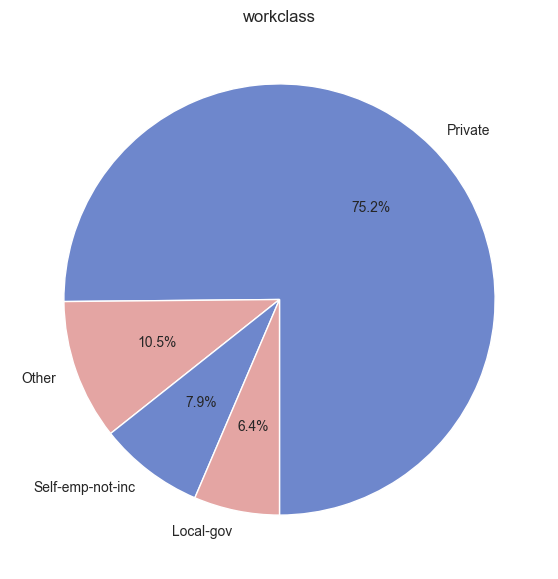

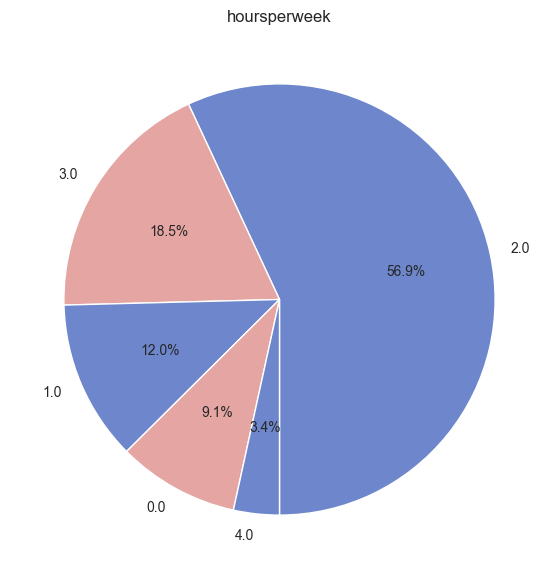

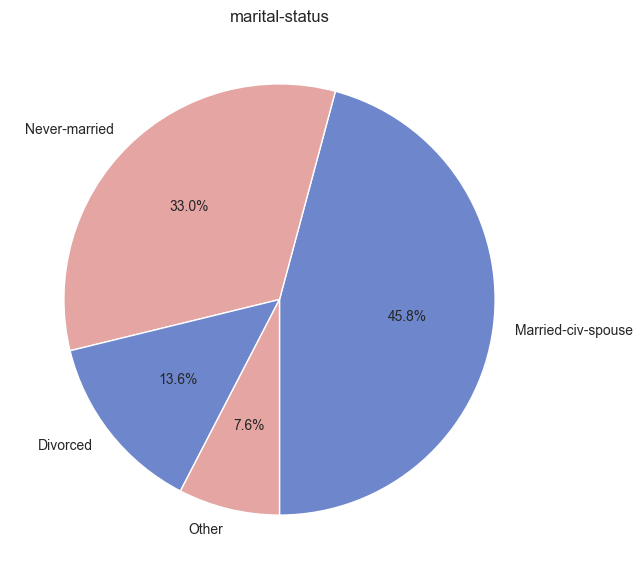

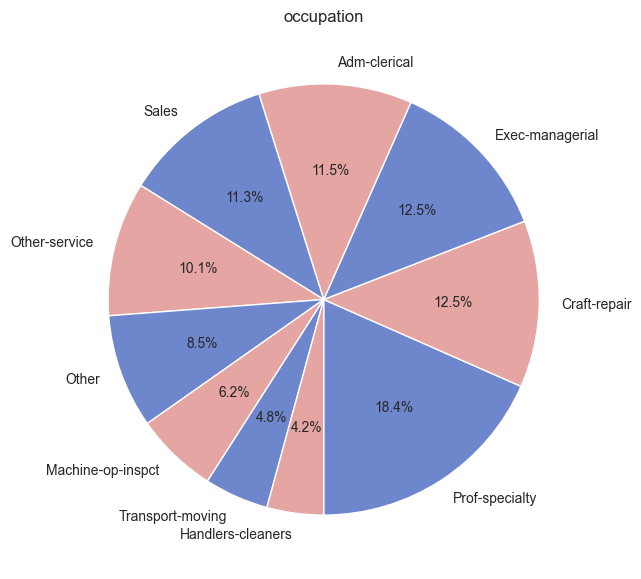

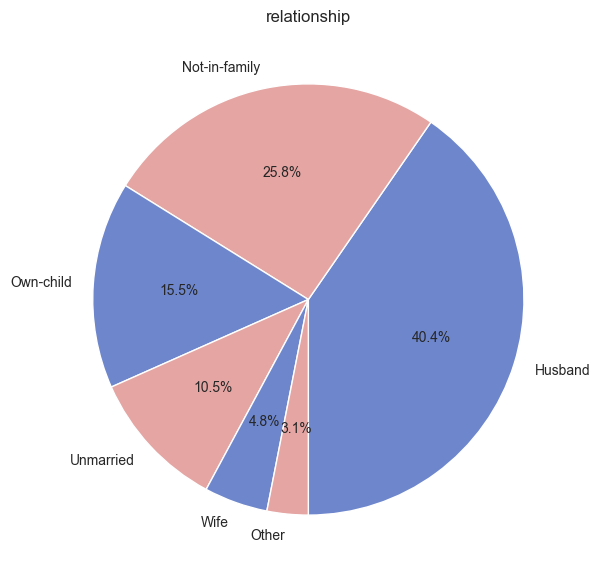

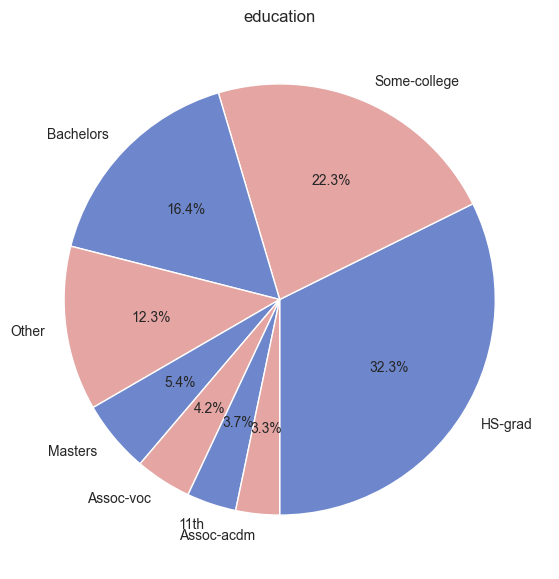

In [463]:
for x in ['workclass','hoursperweek','marital-status','occupation','relationship','education']:
    show_income_pie_chart(df, x)

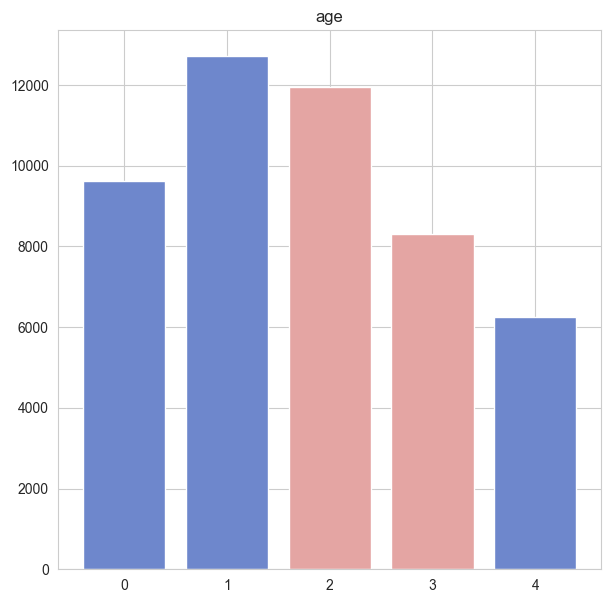

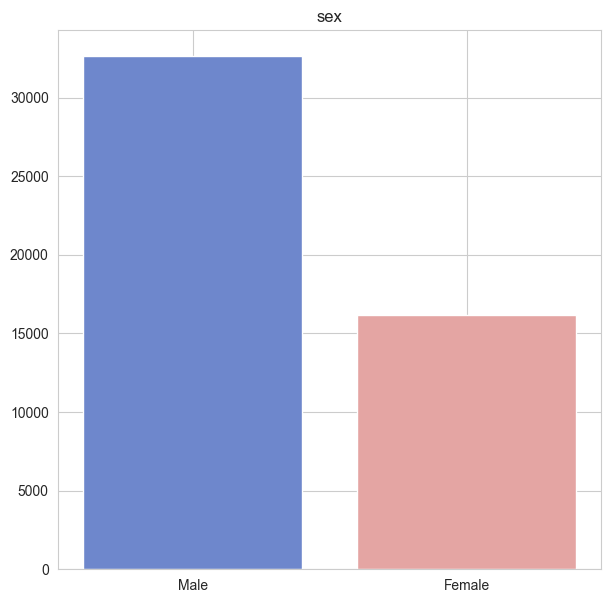

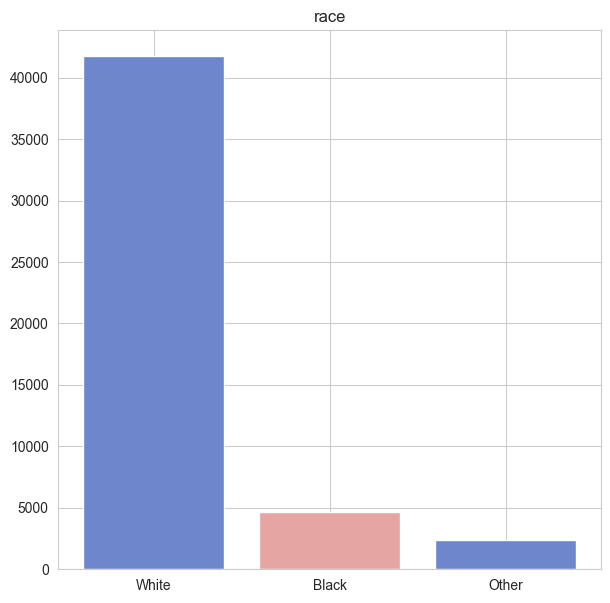

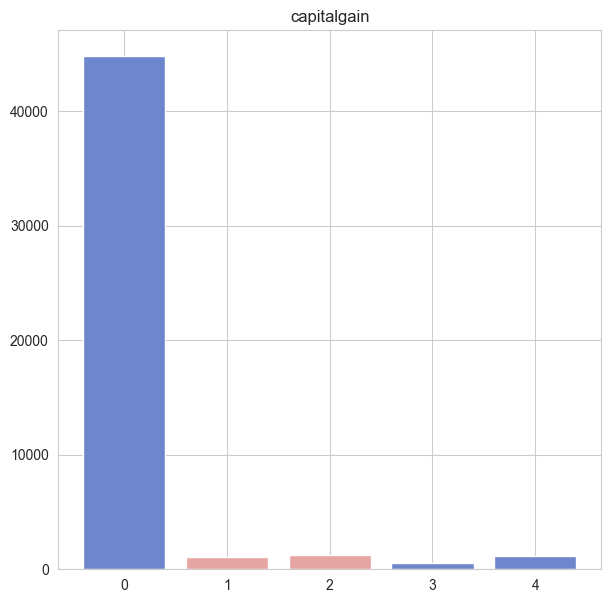

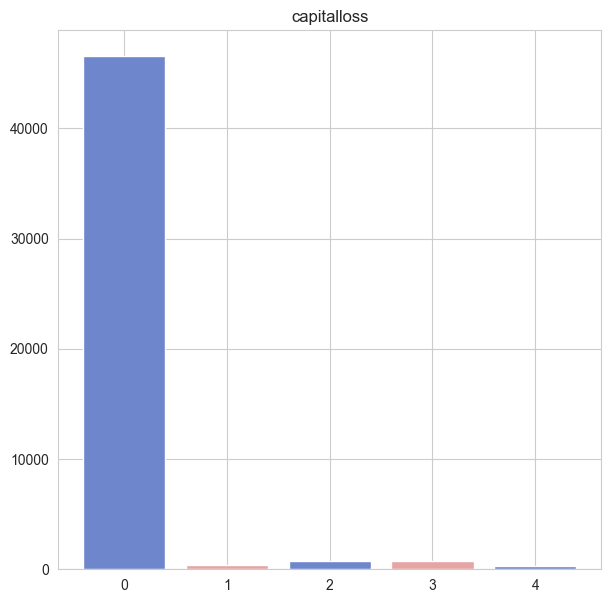

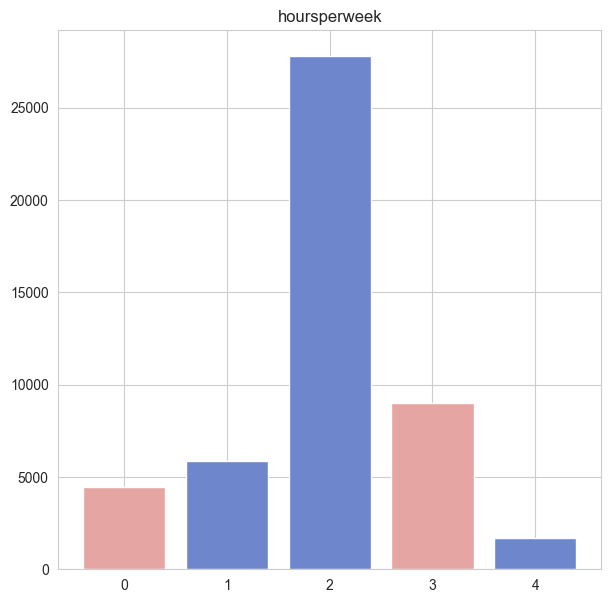

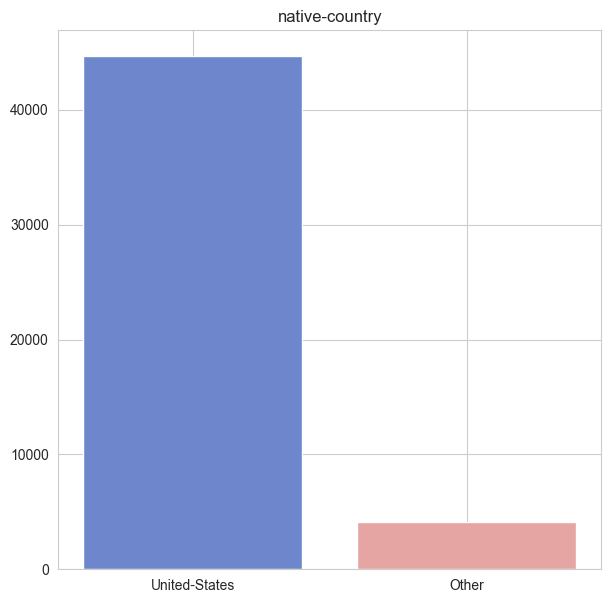

In [464]:
for x in ['age', 'sex', 'race', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country']:
    show_income_bar_chart(df, x)

In [465]:
# Use Pearson correlation to find the correlation between the features
def find_correlation(data: pd.DataFrame):
    corr = data.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Pearson correlation')
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
    plt.show()

In [466]:
# Use Spearman correlation to find the correlation between the features
def find_spearman_correlation(data: pd.DataFrame):
    corr = data.corr(method='spearman')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Spearman correlation')
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
    plt.show()

In [467]:
for col in ['workclass', 'education', 'marital-status','occupation','relationship','race','sex','native-country','class']:
    df_for_corr[col], _ = pd.factorize(df_for_corr[col])

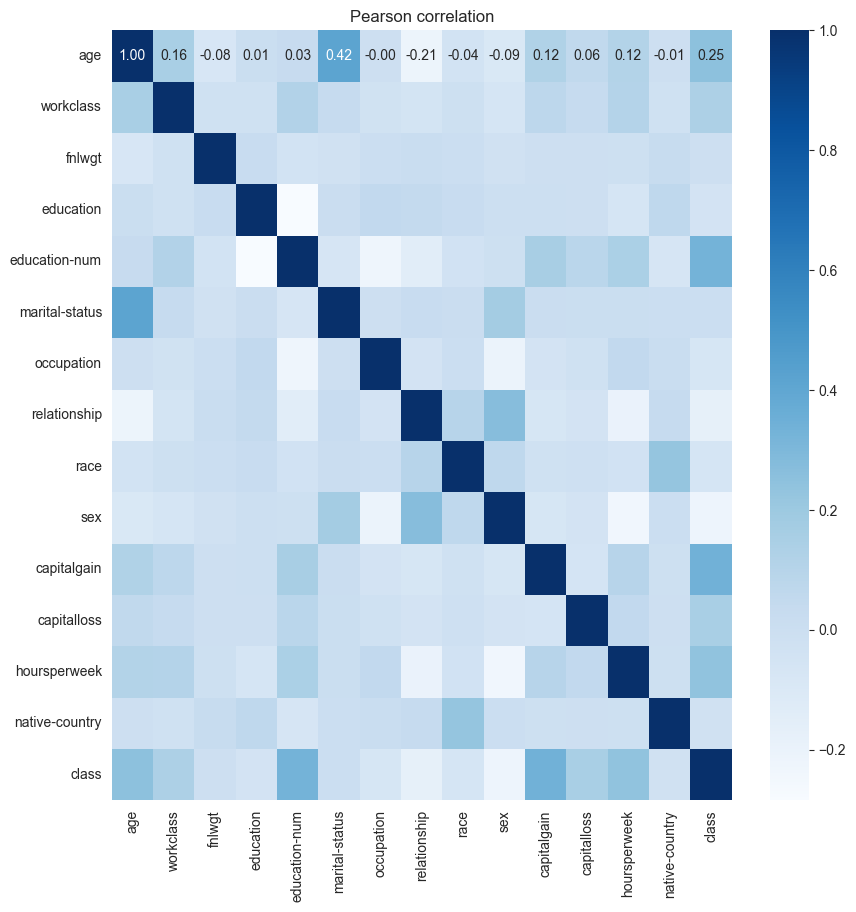

In [468]:
find_correlation(df_for_corr)

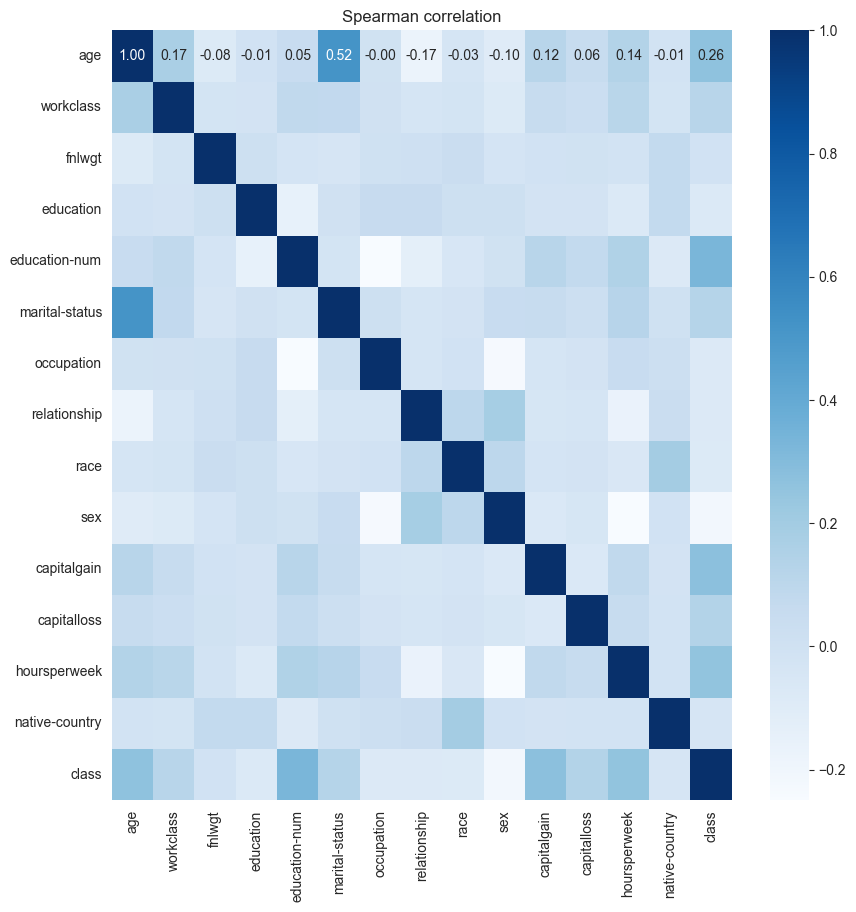

In [469]:
find_spearman_correlation(df_for_corr)